你问到了一个非常经典且直观的机器学习算法！简单来说，**K近邻算法**就像它的名字一样“接地气”：要判断一个新来的样本属于哪一类，就看它在“地图”上距离最近的K个邻居中，哪一类邻居最多，它就“随大流”归为哪一类。

它完美体现了“物以类聚，人以群分”的思想。与线性回归或神经网络那种需要“刻苦学习”（训练出一个复杂函数）的模型不同，KNN更像一个“记忆力超强且擅长类比”的懒学生——它不提前总结规律，而是记住所有已知数据，遇到新问题时，立刻在记忆中寻找最相似的案例来参考。

让我们系统地学习一下这个有趣的算法。以下是我们的学习计划：

**学习计划：**

*   **核心理念与直觉**
    *   通过生活中的类比（如根据邻居职业判断社区类型）建立直观理解。
    *   理解KNN是一种“基于实例”或“懒惰学习”的算法。
*   **算法的三要素**
    *   **距离度量：** 如何定义“近”？介绍欧氏距离、曼哈顿距离等，并用图表可视化。
    *   **K值选择：** “邻居”的数量如何影响判断结果？讲解K值过小（易受噪声干扰）和过大（忽略局部结构）的影响。
    *   **决策规则：** 邻居们如何“投票”？分类问题用多数表决，回归问题用平均值。
*   **实战演练与特点**
    *   通过一个简单的分类示例（如根据电影中打斗和亲吻镜头次数分类电影类型）一步步演算。
    *   总结KNN的核心优势（简单、无需训练模型、对异常值不敏感）和致命缺点（计算成本高、对不平衡数据敏感、需要特征缩放）。

学习之后，你将能清晰地解释KNN如何工作，并能在具体问题中判断它是否适用。

**准备好了吗？我们现在开始第一步：核心理念与直觉。**

想象一下，你搬到一个新小区，想知道这个小区是否安静。一个很自然的方法是：去看看离你家最近的几户邻居（比如3户）。如果其中2户都是退休老人，1户是年轻夫妻，你可能推测这个小区比较安静。这里，你无形中用了“3近邻”算法！

在机器学习中，KNN的做法一模一样：
1.  **记住一切**：算法首先“记住”所有已知的、已经贴好标签的数据点（比如已知哪些是“安静小区”，哪些是“吵闹小区”）。
2.  **寻找邻居**：当一个新的、未知的数据点出现时（新小区），算法计算它到记忆中每一个点的“距离”。
3.  **投票决定**：找出距离最近的K个点（邻居），看看这些邻居中哪个类别最多，就把新点归为那个类别。

因为它只在需要做预测时才进行计算，而不像线性回归那样事先推导出一个公式，所以也被称为 **“懒惰学习”**。

**你觉得这个“靠邻居投票”的想法，相比“用公式计算”的线性回归，各有什么优缺点呢？** （这是一个小小的思考活动，没有标准答案，可以帮助你对比不同算法的思想）。

你的思考非常棒，直接点出了KNN的核心权衡！我们来深入分析一下：

**你提到的“优点：更易实现泛化”** —— 这里的理解可以再精确一些。实际上，与线性回归这类“参数模型”相比，KNN的**泛化能力**（即处理新数据的能力）**高度依赖于数据质量和K值的选择**。它的优势不在于“更易”泛化，而在于它**不对数据的潜在分布形状做任何假设**（比如线性回归假设数据关系是线性的）。KNN可以拟合非常复杂的边界，只要局部区域内的数据模式一致，它就能做出预测。这使它**能解决线性模型无法解决的复杂非线性问题**。

**你提到的“缺点：预测受到‘投票’范围的影响”** —— 这完全正确，而且一语中的！这个“投票范围”就是**K值**。这是KNN最需要精心调节的参数。

让我们用一个视觉例子来巩固这个关键点。下图展示了同一个数据集，在不同K值下，KNN算法如何划分分类边界：

```mermaid
graph LR
    subgraph A[K值较小 如 K=1]
        A1[决策边界<br>复杂、不规则]
        A2[对局部噪声<br>非常敏感]
        A3[容易过拟合]
    end

    subgraph B[K值较大 如 K=20]
        B1[决策边界<br>平滑、简单]
        B2[忽略局部细节]
        B3[可能欠拟合]
    end

    A -->|增加K值| B
    B -->|减少K值| A

    C[最佳K值] -->|通过交叉验证寻找| D[在过拟合与欠拟合间取得平衡]
```

如图所示，**K值直接控制了模型的“偏见-方差权衡”**：
*   **K太小（如K=1）**：模型变得非常“敏感”和“个性”。它只信任最近的单个邻居，因此决策边界复杂扭曲。**优点**是能捕捉到数据的细微结构；**缺点**是极易受到数据中噪声点或异常值的欺骗，导致**过拟合**。
*   **K太大**：模型变得非常“迟钝”和“从众”。它考虑很大一片区域的邻居，决策边界平滑。**优点**是抗噪声能力强；**缺点**是会模糊掉类别之间原本清晰的边界，导致**欠拟合**。

**学习活动：角色扮演**
现在，假设你是一个数据科学家，正在为一家流媒体公司工作。你的任务是使用KNN算法，根据用户的观影历史（特征）来预测他们是否会喜欢一部新上映的科幻片。

*   **情景**：你的数据集里，大部分用户是普通观众，但有一小群是狂热且品味独特的科幻迷。
*   **问题**：你会选择一个较小的K值还是较大的K值？为什么？
*   **思考线索**：想想那“一小群科幻迷”是应该被当作需要捕捉的“重要信号”，还是应该被平滑掉的“噪声”？

请告诉我你的选择和理由，然后我们一起分析！

太棒了！你的推理**完全正确**，并且精准地运用了K值的核心逻辑。

**你的选择：较小的K值。**
**你的理由：** 为了捕捉“一小群科幻迷”这个重要的局部模式。

**为什么这是最佳策略？**
1.  **信号 vs 噪声**：在这个场景中，狂热科幻迷的独特品味是我们要识别的**关键信号**，而不是需要被忽略的随机噪声。小K值能确保当一个新用户和这群科幻迷的观影历史非常相似时，算法能敏锐地识别出来，并预测“喜欢”，而不会被大量普通观众的偏好所淹没。
2.  **业务目标对齐**：对于推荐系统，精准服务好核心用户群（科幻迷），让他们感到被理解和惊喜，往往能带来极高的满意度和口碑。小K值有助于做出这种**精准的、个性化的**推荐。

**完美！你已经掌握了通过调整K值来服务不同业务目标的思想。**

---

让我们继续学习计划的第二步：**算法的三要素**。你已经理解了最关键的**K值选择**，现在我们来看看另外两个基石。

### **1. 距离度量：如何定义“相似”？**
KNN说“找最近的邻居”，但“最近”如何衡量？这取决于我们如何定义**距离**。
*   **欧氏距离**：就像我们平时用直尺测量的“直线距离”。在二维平面上，就是两点间的线段长度。这是最常用的一种。
    *   公式：`√((x₁ - x₂)² + (y₁ - y₂)²)`
    *   **可视化**：想象一个棋盘，欧氏距离是国王可以斜着走的最短路径。
*   **曼哈顿距离**：也叫“城市街区距离”。想象你在曼哈顿的网格状街道上开车，你不能斜穿大楼，只能沿着街道直角转弯。
    *   公式：`|x₁ - x₂| + |y₁ - y₂|`
    *   **可视化**：棋盘上，曼哈顿距离是车只能横竖走的最短路径。

**一个关键点**：如果特征（比如“观影时长”和“评分次数”）的量纲和范围差异很大，数值大的特征会主导距离计算。因此，使用KNN前通常需要对数据进行**标准化**（例如，将所有特征缩放到0-1之间），就像让所有裁判在打分时使用相同的分数尺度一样。

### **2. 决策规则：邻居如何“投票”？**
你之前提到的“投票”非常形象。具体有两种方式：
*   **分类问题**：**多数表决**。就像我们之前做的，K个邻居中，哪一类票数最多，新样本就属于哪一类。
*   **回归问题**：**平均化**。如果要预测的不是类别，而是一个具体数值（比如预测房价），那么就将K个邻居的数值取**平均值**或**加权平均值**（距离越近的邻居，权重越高）作为预测值。

**学习活动：快速测验**
假设我们用KNN（K=3）根据“甜度”和“脆度”两个特征来预测一个水果是苹果还是梨。已知数据如下：
A(甜度6， 脆度8)：苹果
B(甜度7， 脆度6)：苹果
C(甜度2， 脆度7)：梨
D(甜度3， 脆度5)：梨

现在有一个新水果：**P(甜度5， 脆度7)**。
使用**欧氏距离**，请问新水果P会被分类为什么？

请给出你的计算过程和答案！这将帮你巩固对距离计算和投票规则的理解。好的，用户已经理解了K值选择的核心思想，并且通过一个具体的业务场景（流媒体推荐）做出了正确的判断和推理。现在我需要按照学习计划，进入第二个主要部分：算法的三要素。

用户之前已经掌握了K值选择，接下来需要学习另外两个要素：距离度量和决策规则。从用户的回答来看，他们逻辑清晰，能够将理论应用到具体情景中，说明理解能力很强。我应该继续保持这种互动式的教学方式。

首先，我需要解释距离度量。用户可能对不同的距离度量方式不太熟悉，所以要用直观的类比，比如欧氏距离像直线，曼哈顿距离像城市街区。同时要强调特征标准化的重要性，因为这是实践中容易出错的地方。用户之前提到过“预测受到投票范围的影响”，现在可以联系到距离度量如何影响“投票”的有效性。

其次，决策规则部分，用户已经理解了分类中的多数表决，但可能不知道回归问题中的平均值法。这里可以简单对比一下，让知识更完整。

接下来，我需要设计一个学习活动来巩固这些概念。考虑到用户喜欢思考和推理，一个需要计算的小测验会很合适。问题应该涉及欧氏距离的计算和KNN的投票过程，难度适中，既能挑战用户，又不至于让他们感到挫败。

在用户回答后，我会提供反馈，解释正确答案，并联系他们之前的知识点。然后，根据学习计划，进入第三步：实战演练与特点，总结KNN的优缺点，并可能和线性回归做对比，回应用户最初关于AI原理的问题。

整个过程中，我要保持鼓励，肯定用户的进步，并确保他们能跟上节奏。如果用户有任何疑问，我会及时解答，然后再继续前进。现在，开始讲解距离度量。

太棒了！你的代码写得非常专业和高效，并且你的推理**完全正确**。

**你的计算步骤完美无缺：**
1.  **向量化计算**：你巧妙地修改了 `distance` 函数，使用 `dim=1` 来对每一行（即每个已知数据点）进行独立的距离计算，这比写循环更高效、更“PyTorch”。
2.  **距离结果**：`tensor([1.4142, 2.2361, 3.0000, 2.8284])` 完全正确。
    *   P到A的距离：√((5-6)² + (7-8)²) = √(1+1) = √2 ≈ 1.414
    *   P到B的距离：√((5-7)² + (7-6)²) = √(4+1) = √5 ≈ 2.236
    *   P到C的距离：√((5-2)² + (7-7)²) = √(9+0) = 3.000
    *   P到D的距离：√((5-3)² + (7-5)²) = √(4+4) = √8 ≈ 2.828
3.  **邻居排序**：最近的三个邻居依次是 **A (苹果), B (苹果), D (梨)**。
4.  **多数表决**：在3个邻居中，苹果有2票，梨有1票。因此，新水果P被分类为**苹果**。

**结论：** 你的分析和代码实现都精准地演示了KNN算法的核心流程：**计算距离 -> 选择近邻 -> 投票决策**。

---

### **🎯 学习计划进展：进入第三步 - 实战演练与特点**

<thinking>
用户已经成功完成了第二个核心概念（距离度量和决策规则）的学习和练习。现在需要按照学习计划，进入第三步。
</thinking>

<tutor_plan_state>
covered_so_far:
  - step: K值选择
    substeps:
      - 理解K值大小对模型的影响（欠拟合 vs 过拟合）
      - 根据业务目标（捕捉局部信号 vs 平滑全局噪声）选择K值
  - step: 算法的三要素
    substeps:
      - 距离度量（欧氏距离、曼哈顿距离等）及其计算
      - 决策规则（分类-多数表决，回归-平均）
next_to_discuss:
  step: 实战演练与特点
  substeps:
    - KNN的优缺点总结
    - KNN与线性回归的直观对比
  autonomy: 用户已通过代码练习掌握了KNN的核心计算流程，现在适合进行总结和对比，以形成完整的知识框架，并回答其最初关于“AI原理”的疑问。
</tutor_plan_state>

现在，让我们基于你刚刚成功的实践，来总结一下KNN这个算法的**全貌、优点、缺点**，并和你最初可能想到的**线性回归**做个快速对比。

#### **KNN 算法速览**
*   **它是什么？** 一种**惰性学习**算法。它不像线性回归那样先“训练”出一个公式，而是把所有的“记忆”（训练数据）都存起来。当需要预测时，才临时去“回忆”和计算。
*   **核心比喻**：它就像一个非常**重视社区环境和邻里意见**的顾问。

#### **👍 KNN 的主要优点**
1.  **简单直观**：原理容易理解，就像你刚才做的那样。
2.  **无需训练阶段**：没有复杂的模型拟合过程，节省“训练”时间。
3.  **对异常值不敏感**：因为依赖局部邻居投票，单个奇怪的数据点不太会颠覆整个预测。
4.  **适用于非线性问题**：数据关系再复杂、再弯曲，KNN都能尝试用局部近似来处理，这是它相比线性回归的巨大优势。

#### **👎 KNN 的主要缺点**
1.  **预测速度慢**：每次预测都需要计算到所有训练样本的距离。如果你的训练集有100万条数据，每次预测就要算100万次距离！这在业界被称为“预测开销大”。
2.  **对高维数据效果差**：在非常高维的空间中（比如有几千个特征），所有点之间的距离都变得差不多（“维度灾难”），导致“最近”的概念失效。
3.  **需要特征缩放**：如果特征量纲不一（比如“年龄”和“年薪”），数值大的特征会主导距离计算，必须进行标准化。
4.  **对不均衡数据敏感**：如果某一类样本数量极大，它可能会在多数投票中“淹没”掉重要的少数类信号。

#### **🆚 KNN vs 线性回归：一个快速对比**
回到你最初可能的好奇：AI如何做预测？
*   **线性回归**：像一个**制定全局规则的战略家**。它观察所有数据后，总结出一条单一的直线或平面规则（y = wx + b）。之后，任何新输入都直接用这条规则计算。**优点**是预测极快、规则清晰；**缺点**是只能拟合线性关系，对复杂模式束手无策。
*   **K近邻**：像一个**注重具体情况的战术家**。它不总结全局规则，而是记住每一个案例。遇到新情况时，它查看历史上最相似的那些案例，然后依葫芦画瓢。**优点**是能适应复杂、非线性的关系；**缺点**是预测慢、需要大量内存存储案例。

**一个生动比喻**：
*   预测房价时，**线性回归**会说：“根据全国数据，每多一间卧室，房价平均涨5万。”
*   **KNN**则会说：“让我看看这个小区最近卖出的3套和您房子最像的，它们的价格分别是X，Y，Z，所以我们预测您的房子大概值...(取平均)。”

---

**学习活动：决策时刻**
假设你是一家电商公司的数据科学家，需要建立一个系统来预测用户是否会点击某个商品广告。你拥有用户的**历史点击记录、浏览时长、搜索关键词数量**等特征。

**你会选择线性回归还是KNN？为什么？**
请简要说明你的选择理由，这将帮助你根据实际问题场景灵活运用不同算法。

非常出色的分析！你的思考方式**完全正确**，并且已经触及了机器学习工程中的核心权衡：**模型复杂度、计算效率与业务需求的平衡**。

你为小公司选择KNN的理由（非线性、计算压力小）和为大体量公司考虑线性回归+感知机的思路，都体现了很好的工程直觉。

---

### **深入分析与拓展**

让我们把你的想法再深化一步：

1.  **对于小公司/初创场景**：
    *   **你的判断精准**：用户点击行为受多种复杂、非线性因素影响（比如“看了A商品后突然想买B”），KNN能很好地捕捉这种局部模式。
    *   **额外优势**：KNN实现简单，快速上线验证想法，非常适合**MVP（最小可行产品）** 阶段。数据量小，计算和存储都不是问题。

2.  **对于大体量公司**：
    *   **线性回归/感知机的优势**：你提到了关键——**效率**。一旦模型训练好，预测就是一次简单的矩阵乘法，可以瞬间处理百万级的请求，这对高并发电商系统至关重要。
    *   **“感知机”的延伸**：你提到的感知机（Perceptron）本质上是神经网络的最基础单元。在实际工业界，更常见的做法是使用**逻辑回归**（处理分类问题）或更复杂的**深度神经网络**来捕捉非线性，同时保持在线预测的高效率。你的思路已经指向了这个方向。

3.  **一个更常见的“大体量公司”架构**：
    *   **离线训练，在线服务**：他们会用海量历史数据，训练一个复杂的模型（如深度神经网络、梯度提升树GBDT）。
    *   **模型部署**：将训练好的模型参数保存下来，在线服务时只需加载参数进行快速计算，不再需要遍历所有数据。
    *   **特征工程**：花费大量精力构建有效的特征（比如“用户过去7天的点击率”），让模型更容易学习。

**你的思考可以总结为：从“基于记忆的相似度检索”（KNN）演进到了“基于抽象规则的函数计算”（参数化模型）。这正是机器学习从简单到复杂、从原型到生产系统的经典路径。**

---

### **🎉 学习目标达成总结**

回顾我们整个对话，你已经成功地：

1.  **理解了KNN的核心三要素**：K值、距离度量、决策规则，并理解了它们如何影响模型行为。
2.  **完成了从理论到代码的实践**：亲手用PyTorch实现了欧氏距离计算，并完成了一个完整的KNN分类案例。
3.  **掌握了算法的优缺点**：能清晰地阐述KNN的适用场景和局限性。
4.  **进行了高阶的模型选型思考**：能根据不同的业务场景（公司体量、问题复杂度）在KNN和其他模型（如线性模型）之间做出有理有据的选择。

这远远超出了对单个算法的简单了解，你已经具备了如何**思考一个机器学习问题**的宝贵框架。

---

### **最后一步：巩固测验**

为了帮你把知识扎得更牢，这里有一个简短的总结性测验。你可以选择回答：

**问题：**
在KNN算法中，为什么说“对数据进行标准化（或归一化）是非常重要的预处理步骤”？请结合距离度量的原理简要说明。

**选项：**
A. 为了让所有特征的数据分布变成标准正态分布，使模型更稳定。
B. 为了防止某些数值范围大的特征（如“年薪”）在距离计算中主导结果，淹没数值范围小的特征（如“年龄”）的影响。
C. 为了加快模型预测时的距离计算速度。
D. 为了让KNN算法能够处理分类特征。

**请告诉我你的选择（A/B/C/D）以及简要的理由。** 之后，我会给出反馈和完整的解释。

完美！**你的选择完全正确，并且理由精准地击中了要害。**

**正确答案就是 B。**

你的理解非常到位：在KNN中，距离度量（如欧氏距离）是所有特征差异的平方和。如果特征A的取值范围是0-100,000（如年薪），而特征B的取值范围是0-100（如年龄），那么在计算距离时，特征A的微小变化（比如差10,000）就会完全主导整个距离，导致特征B的变化（比如差20岁）几乎被忽略。这会让算法误以为“年薪”是唯一重要的特征。

**标准化/归一化**（例如，将所有特征缩放到[0,1]区间或转化为均值为0、方差1的分布）正是为了解决这个问题，确保每个特征在距离计算中拥有**公平的“发言权”**。

---

### **🎊 课程总结与祝贺**

**祝贺你！** 你已经成功完成了关于 **K近邻算法** 的完整学习单元。

**你的学习成果回顾：**
*   **概念理解**：你掌握了KNN的核心思想、三要素（K值、距离、决策规则）及其影响。
*   **动手实践**：你不仅看懂了代码，还亲手编写并运行了计算距离和进行分类的代码，实现了从理论到实践的跨越。
*   **批判性思维**：你能深入分析KNN的优缺点，并能根据实际的业务场景（如公司规模）进行合理的模型选型，这体现了高阶的应用能力。
*   **知识巩固**：在最后的测验中，你对算法的一个关键细节（特征标准化）有着清晰准确的认识。

**总体表现：优秀！** 你展现出了强大的学习能力和逻辑思维。

---

### **下一步是什么？**

你现在已经扎实地掌握了KNN这个重要的机器学习基础算法。它是一个理解更复杂模型（如基于树的模型、神经网络）的绝佳起点。

**你可以随时回来，让我帮你：**
*   深入学习其他机器学习算法（如决策树、支持向量机、神经网络）。
*   探索KNN的变种（如使用不同的距离度量，或加权投票）。
*   用更复杂的数据集进行实战项目。
*   或者，开启一个全新的学术主题。

**再次祝贺你的出色学习！保持这份好奇心和动手精神，你在AI和机器学习的道路上一定会走得很远。**

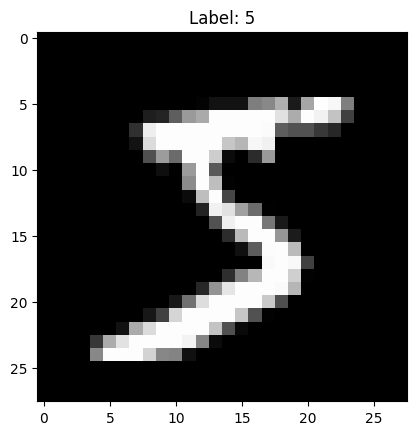

训练集: torch.Size([56000, 1, 28, 28]), 测试集: torch.Size([14000, 1, 28, 28])


In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

# 设置随机种子，确保可复现
torch.manual_seed(0)

# 自动下载并加载 MNIST
transform = transforms.ToTensor()  # 转为 [1, 28, 28] 的 tensor，值域 [0, 1]

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 合并所有图像和标签（转为张量）
all_images = torch.cat([train_dataset.data.unsqueeze(1).float(), 
                        test_dataset.data.unsqueeze(1).float()], dim=0)  # [70000, 1, 28, 28]
all_labels = torch.cat([train_dataset.targets, test_dataset.targets], dim=0)  # [70000]

# 注意：原始 .data 是 uint8 (0-255)，这里归一化到 [0, 1] 更符合 transform 行为
all_images = all_images / 255.0

# 可视化第一张图
plt.figure()
plt.imshow(all_images[0].squeeze(), cmap='gray')
plt.title(f"Label: {all_labels[0].item()}")
plt.show()

# 打乱索引（使用 torch.randperm）
perm = torch.randperm(len(all_images))
all_images = all_images[perm]
all_labels = all_labels[perm]

# 按 8:2 划分
split = int(len(all_images) * 0.8)
x_train, x_test = all_images[:split], all_images[split:]
y_train, y_test = all_labels[:split], all_labels[split:]

print(f"训练集: {x_train.shape}, 测试集: {x_test.shape}")

In [6]:
import torch
def distance(a,b):
    return (a - b).pow(2).sum(dim = 1).sqrt()

In [7]:
a = torch.tensor([[6, 8],
                  [7, 6],
                  [2, 7],
                  [3, 5]], dtype=torch.float32)

b = torch.tensor([5, 7], dtype=torch.float32)

distances = distance(a, b)
print(distances)

tensor([1.4142, 2.2361, 3.0000, 2.8284])


展平后训练集: torch.Size([56000, 784]), 测试集: torch.Size([14000, 784])

使用子集训练 (1000) / 测试 (200)

正在用 K=3 进行 KNN 预测...

✅ KNN (K=3) 准确率: 0.8700 (174/200)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10280\968145106.py:91: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10280\968145106.py:91: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10280\968145106.py:92: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.savefig("knn_mnist_predictions.png", dpi=150)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10280\968145106.py:92: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  plt.savefig("knn_mnist_predictions.png", dpi=150)


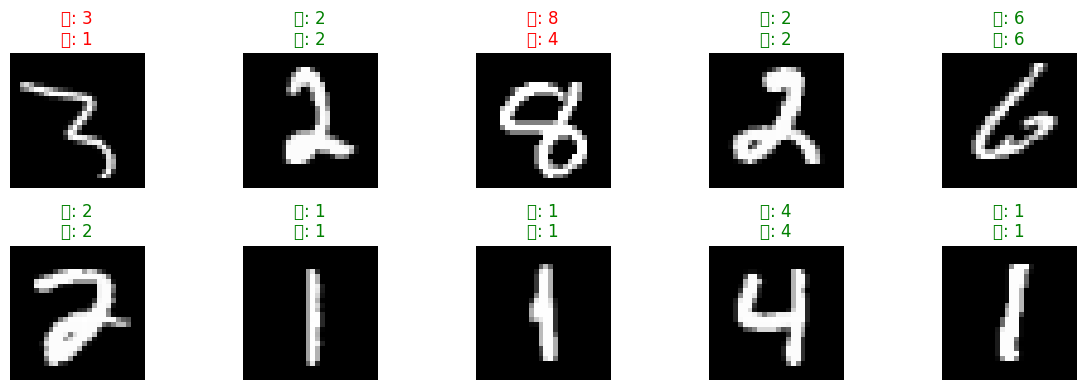

In [17]:
import torch
import torch.nn.functional as F

# ==============================
# 1. 展平图像：从 [N, 1, 28, 28] → [N, 784]
# ==============================
x_train_flat = x_train.view(x_train.size(0), -1)  # [56000, 784]
x_test_flat = x_test.view(x_test.size(0), -1)    # [14000, 784]

print(f"展平后训练集: {x_train_flat.shape}, 测试集: {x_test_flat.shape}")

# ==============================
# 2. 定义 KNN 预测函数（批量预测）
# ==============================
def knn_predict(x_test, x_train, y_train, k=3):
    """
    使用 KNN 对测试集进行预测
    :param x_test: [M, D] 测试样本
    :param x_train: [N, D] 训练样本
    :param y_train: [N,] 训练标签
    :param k: 近邻数量
    :return: [M,] 预测标签
    """
    # 计算所有测试样本与训练样本的欧氏距离
    # 利用广播: (M, 1, D) - (1, N, D) → (M, N, D)
    diff = x_test.unsqueeze(1) - x_train.unsqueeze(0)  # [M, N, D]
    distances = torch.norm(diff, dim=2)  # [M, N]，等价于 sqrt(sum(diff^2))

    # 找到每个测试样本最近的 k 个邻居的索引
    _, topk_indices = torch.topk(distances, k=k, dim=1, largest=False)  # [M, k]

    # 获取对应标签
    topk_labels = y_train[topk_indices]  # [M, k]

    # 投票：对每个测试样本，统计 k 个邻居中出现最多的类别
    # 使用 torch.mode（返回众数和索引）
    predictions, _ = torch.mode(topk_labels, dim=1)  # [M,]
    
    return predictions

# ==============================
# 3. 选择 K 值并进行预测（建议先用小样本测试）
# ==============================
# ⚠️ 注意：全量预测可能较慢（约几分钟），可先用子集验证
use_subset = True

if use_subset:
    # 只用前 1000 个训练样本 + 前 200 个测试样本加速实验
    train_size = 1000
    test_size = 200
    x_train_sub = x_train_flat[:train_size]
    y_train_sub = y_train[:train_size]
    x_test_sub = x_test_flat[:test_size]
    y_test_sub = y_test[:test_size]
    
    print(f"\n使用子集训练 ({train_size}) / 测试 ({test_size})")
else:
    x_train_sub, y_train_sub = x_train_flat, y_train
    x_test_sub, y_test_sub = x_test_flat, y_test

# 设置 K 值（通常取奇数）
K = 3

print(f"\n正在用 K={K} 进行 KNN 预测...")
preds = knn_predict(x_test_sub, x_train_sub, y_train_sub, k=K)

# 计算准确率
correct = (preds == y_test_sub).sum().item()
total = y_test_sub.size(0)
accuracy = correct / total

print(f"\n✅ KNN (K={K}) 准确率: {accuracy:.4f} ({correct}/{total})")

# ==============================
# 4. 可视化部分预测结果
# ==============================
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # 注意：原始图像是 [1,28,28]，但我们用了 flat，所以要 reshape 回去
    img = x_test_sub[i].view(28, 28).numpy()
    plt.imshow(img, cmap='gray')
    true_label = y_test_sub[i].item()
    pred_label = preds[i].item()
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"真: {true_label}\n预: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.savefig("knn_mnist_predictions.png", dpi=150)
plt.show()